### Some questions we have to answer before starting:
1. What is business question?
   - Predict whether or not a patient has diabetes, based on certain diagnostic measurements.
2. What does each row represents?
   - Each row represents a female patient.
3. What is the evaluation method?
   - The percent of correct predections of whether that person is diabetic or not

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

# Load Data

In [2]:
df = pd.read_csv('diabetes2.csv')

# Data Understanding

In [61]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [63]:
df.shape

(768, 9)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> - There are 786 records
> - No null values

In [65]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [66]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

# Handling missing values

In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> There are no missing values. But, some columns can't have zero values, like ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] columns.

In [4]:
zeroColumns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [5]:
for col in zeroColumns:
    print(f"Number of the rows having zero in {col} column: {len(df[df[col] == 0])}")

Number of the rows having zero in Glucose column: 5
Number of the rows having zero in BloodPressure column: 35
Number of the rows having zero in SkinThickness column: 227
Number of the rows having zero in Insulin column: 374
Number of the rows having zero in BMI column: 11


> I will replace those zero values with each column`s mean value respectively

In [6]:
for col in zeroColumns:
    df[col].replace(0,df[col].mean(),inplace=True)

In [7]:
for col in zeroColumns:
    print(f"Number of the rows having zero in {col} column: {len(df.loc[df[col] == 0])}")

Number of the rows having zero in Glucose column: 0
Number of the rows having zero in BloodPressure column: 0
Number of the rows having zero in SkinThickness column: 0
Number of the rows having zero in Insulin column: 0
Number of the rows having zero in BMI column: 0


# Checking outliers

# Asking questsions

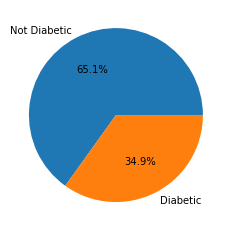

In [8]:
labels = ["Not Diabetic", "Diabetic"]
plt.pie(df["Outcome"].value_counts(),labels=labels,autopct='%.1f%%');

> 65.1% of the patients are not diabetic and the other 34.9% are diabetic

## How does pregnancy affect the outcome?

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

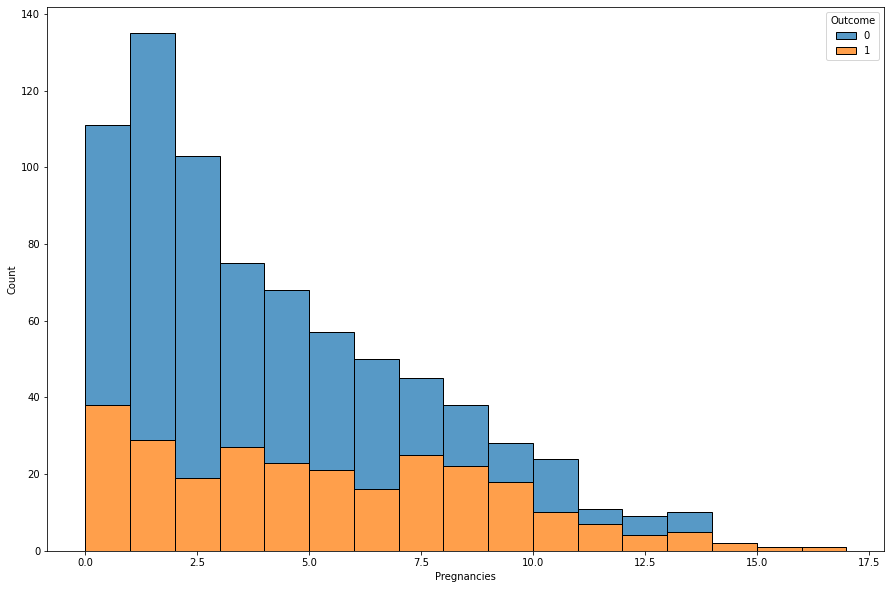

In [69]:
plt.subplots(figsize=(15,10))
sns.histplot(data=df, x="Pregnancies", hue="Outcome", multiple="stack", binwidth=1)

## How does Glucose affect the outcome?

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

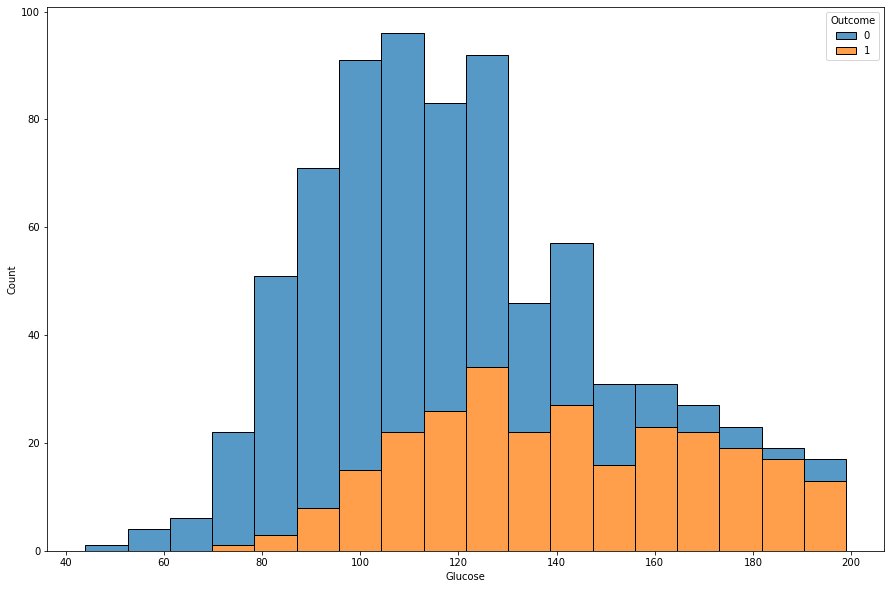

In [70]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='Glucose', hue="Outcome", multiple="stack")

>- Females with plasma glucose concentration between 158 and 199 are more likely to be diabetics
>- Females with plasma glucose concentration between 44 and 130 are more likely not to be diabetics

## How does Blood Pressure affect the outcome?

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

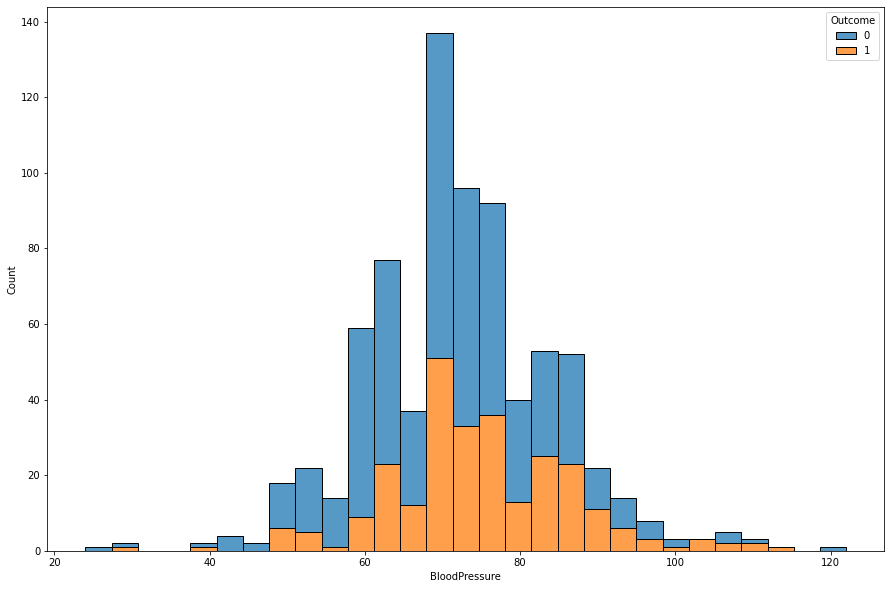

In [72]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='BloodPressure', hue="Outcome", multiple="stack")

>- females with Diastolic blood pressure between 68 and 78 mm Hg are more likely not to be diabetics

## How does Skin Thickness affect the outcome?

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

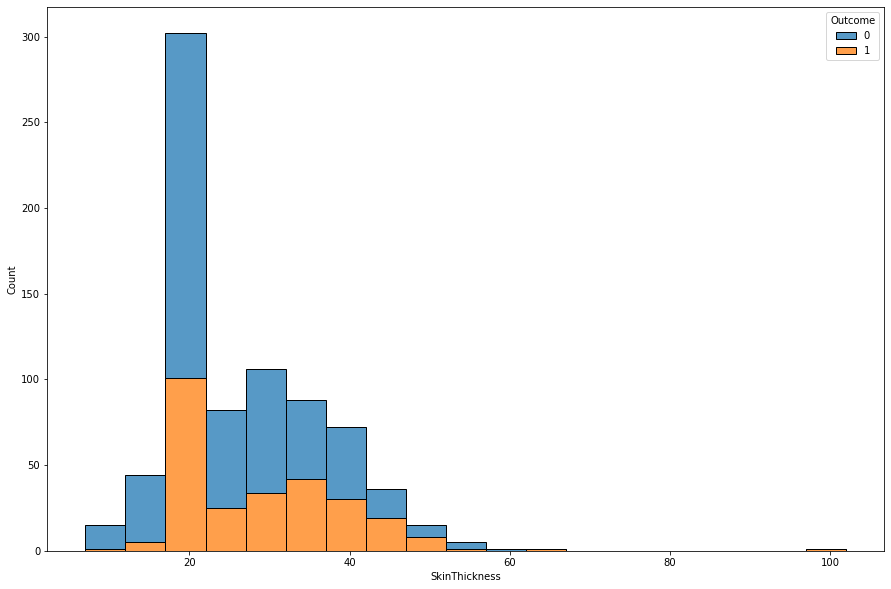

In [73]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='SkinThickness', hue="Outcome", multiple="stack", binwidth=5)

## How does Insulin affect the outcome?

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

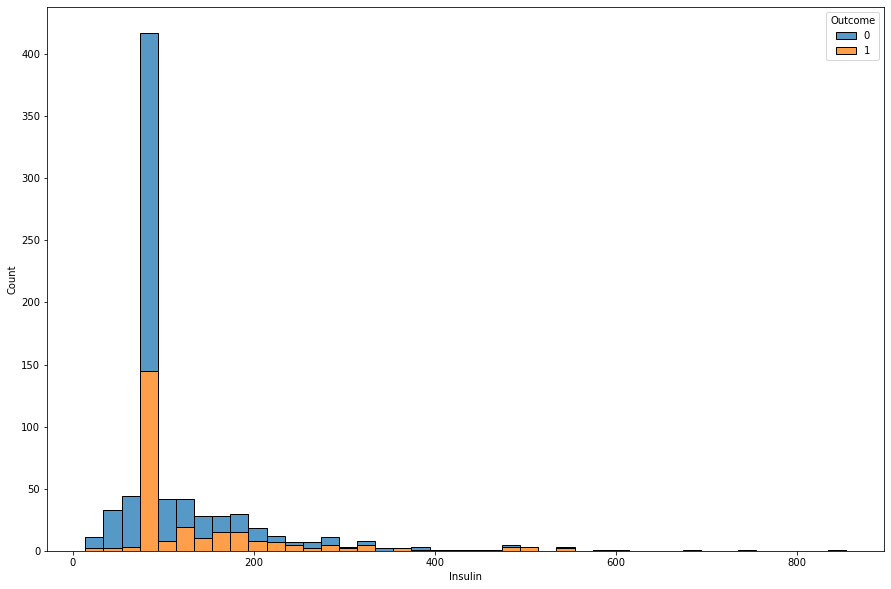

In [37]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='Insulin', hue="Outcome", multiple="stack", binwidth=20)

## How does BMI affect the outcome?

<AxesSubplot:xlabel='BMI', ylabel='Count'>

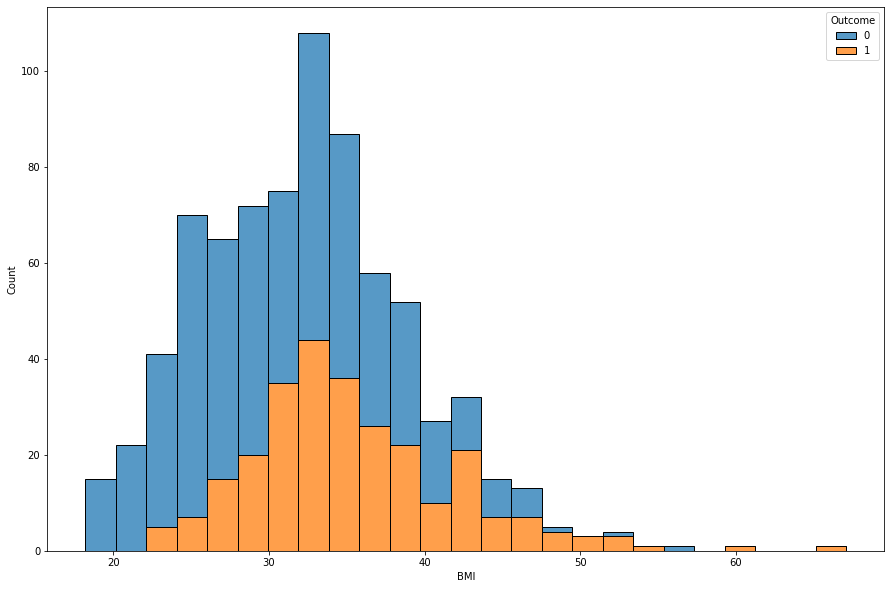

In [41]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='BMI', hue="Outcome", multiple="stack")

>- Females with BMI between 48 and 56 kg/(height in m)^2 are more likely to be diabetic
>- Females with BMI between 18.2 and 30 kg/(height in m)^2 are more likely not to be diabetic

## How does Age affect the outcome?

<AxesSubplot:xlabel='Age', ylabel='Count'>

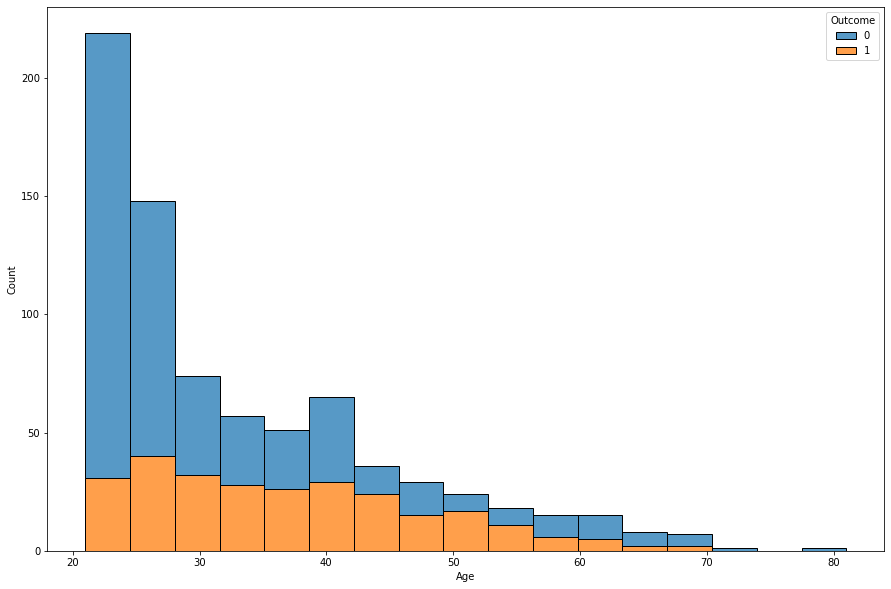

In [40]:
    plt.subplots(figsize=(15,10))
    sns.histplot(data=df, x='Age', hue="Outcome", multiple="stack")

> - Those whose age between 21 and 30 are more likely not to be diabetics
> - Those whose age between 45 and 55 are more likely to be diabetics
> - Younger females are more likely not to be diabetics than older ones

# Logestic Regression

In [31]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [106]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [107]:
x_test.shape,y_test.shape

((154, 8), (154,))

In [32]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression(max_iter=250,random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("Best hyperparameters ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Best hpyerparameters  {'C': 0.01, 'penalty': 'l2'}
Accuracy : 0.7639344262295082


d:\2\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "d:\2\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\2\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\2\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: 

In [21]:
lgReg = LogisticRegression(max_iter=500, random_state=0, C=0.01, penalty='l2')
lgReg.fit(x_train,y_train)

LogisticRegression(C=0.01, max_iter=500, random_state=0)

In [22]:
lgReg.score(x_test,y_test)

0.8376623376623377

In [23]:
lgReg.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [24]:
lgReg.predict([x_test.iloc[1,0:]])[0]

d:\2\Programs\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [25]:
lgReg.predict_proba([x_test.iloc[1,0:]])

d:\2\Programs\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.92999581, 0.07000419]])

# Evaluation

In [26]:
y_pred = lgReg.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

d:\2\Programs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


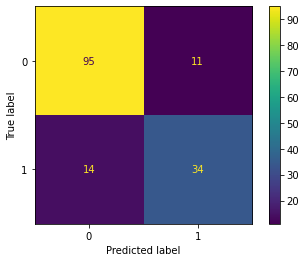

In [27]:
plot_confusion_matrix(lgReg, x_test, y_test)  
plt.show()

In [28]:
accuracy_score(y_test, lgReg.predict(x_test))

0.8376623376623377

In [29]:
print(classification_report(y_test, lgReg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       106
           1       0.76      0.71      0.73        48

    accuracy                           0.84       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.84      0.84      0.84       154

